<a href="https://colab.research.google.com/github/souldrive7/ECP/blob/main/modeling_kadai_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 演習課題
## 1. a.実データセットを一つ選んで、PCアルゴリズムを適用し、因果グラフのプロットを出力せよ。ただし、以下の条件を満たすこと：
- 独立検定の有意水準を **0.1** に設定する。  
- 実データの出典も明記する。  
- 相関係数に基づく検定を使う場合、変数集合の中に**離散変数とカテゴリカル変数を取り除く**こと。  
- 結果の因果グラフにおいて、**4つ以上のノードを含む**ようにすること。

## 1. b.上記のデータを用いて、下記に解答せよ：
- 一つの変数を**介入変数**、一つの変数を**目的変数**として選び、  
- **直接因果効果の推定値**を求めよ。  
- その際に使用した**調整変数**を明記すること。

## 2. X₁ と X₂ の間に未観測の交絡変数が存在しないことを証明せよ：
FCI の出力が以下のグラフになると仮定する
- データの経験分布が忠実であると仮定する。  
- FCI の全ての条件付き独立検定が正しい結果を返すと仮定する。  
- このとき、**X₁ と X₂ の間に未観測の交絡変数が存在しないことを証明せよ。**
---
---

## 1.PCアルゴリズムを適用し、因果グラフのプロットを出力せよ。
**実データ分析概要**：

PCアルゴリズムを用いて、金価格に影響を与える金融要因を分析した。

**条件**：
- 有意水準：0.1
- 検定方法：相関係数に基づく Fisher's Z 検定
- データ前処理：カテゴリカル・離散変数は含まれていない
- ノード数：5（SPX, GLD, USO, SLV, EUR/USD）
- データ出典：下記のGithubのオープンデータより取得

https://github.com/jigyasaG18/Gold-Price-Prediction-Project-using-Machine-Learning/blob/main/gold_price_data.csv

- データ項目: 金価格・株価・原油・銀・為替の金融市場データ:期間2008年から2018年
- 変数（日次）：SPX（S&P500株価指数）,GLD（金ETF）,USO（原油ETF）,SLV（銀ETF）,EUR/USD（ユーロドル為替）

## 1. b.上記のデータを用いて、下記に解答せよ：
**目的**：各変数が金価格に与える直接因果効果を推定

**介入変数**：`SPX`（S&P500株価指数）  
**目的変数**：`GLD`（金ETF）  
**調整変数**：`USO`（原油ETF）, `SLV`（銀ETF）, `EUR/USD`（ユーロドル為替）

[直接因果効果の推定値]

S&P500株価指数（SPX）の金価格（GLD）への直接因果効果: 0.0067 GLD単位/指数単位

【追加の分析として、下記を試みた】
- Lingamモデルへの適応
---

In [23]:
!pip install git+https://github.com/py-why/causal-learn.git

  Cloning https://github.com/py-why/causal-learn.git to /tmp/pip-req-build-3joeoh0m
  Running command git clone --filter=blob:none --quiet https://github.com/py-why/causal-learn.git /tmp/pip-req-build-3joeoh0m
  Resolved https://github.com/py-why/causal-learn.git to commit 9689c1bdc468847729eacf0921b76f598161ae16
  Preparing metadata (setup.py) ... done


In [24]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
data_path = '/content/drive/MyDrive/Dataset/kadai/gold_price_data.csv'
df = pd.read_csv(data_path)

# 'Date'列を日付型に変換し、インデックスとして設定
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 欠損値の処理
df = df.dropna()

# 日付列を削除
#df = df.drop(columns=['EUR/USD'])

# 欠損値の確認
print(df.isnull().sum())

# データの確認
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64
                    SPX        GLD        USO     SLV   EUR/USD
Date                                                           
2008-01-02  1447.160034  84.860001  78.470001  15.180  1.471692
2008-01-03  1447.160034  85.570000  78.370003  15.285  1.474491
2008-01-04  1411.630005  85.129997  77.309998  15.167  1.475492
2008-01-07  1416.180054  84.769997  75.500000  15.053  1.468299
2008-01-08  1390.189941  86.779999  76.059998  15.590  1.557099


In [25]:
# データの確認
print(df.tail())

                    SPX         GLD      USO      SLV   EUR/USD
Date                                                           
2018-05-08  2671.919922  124.589996  14.0600  15.5100  1.186789
2018-05-09  2697.790039  124.330002  14.3700  15.5300  1.184722
2018-05-10  2723.070068  125.180000  14.4100  15.7400  1.191753
2018-05-14  2730.129883  124.489998  14.3800  15.5600  1.193118
2018-05-16  2725.780029  122.543800  14.4058  15.4542  1.182033


In [26]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.GraphUtils import GraphUtils

# データをNumPy配列に変換
data = df.to_numpy()

# 変数名のリスト
labels = df.columns.tolist()

# PCアルゴリズムの適用
cg = pc(data, alpha=0.1, indep_test='fisherz', node_names=labels)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

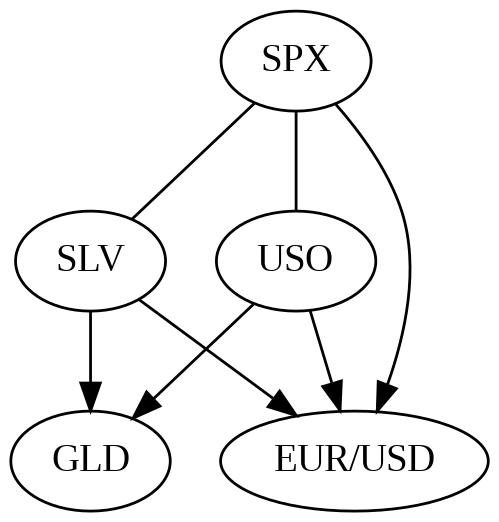


[回帰結果要約]
                            OLS Regression Results                            
Dep. Variable:                    GLD   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     4246.
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        04:19:39   Log-Likelihood:                -8015.9
No. Observations:                2290   AIC:                         1.604e+04
Df Residuals:                    2285   BIC:                         1.607e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.7963      3.277     21.30

In [27]:
# セットアップ
import pandas as pd
import numpy as np
import statsmodels.api as sm
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.GraphUtils import GraphUtils
from causallearn.utils.cit import fisherz
from IPython.display import Image, display
import matplotlib.pyplot as plt

# PCアルゴリズム
data = df.to_numpy()
labels = df.columns.tolist()
cg = pc(data, alpha=0.1, indep_test_func=fisherz, node_names=labels)

# 因果グラフの描画と保存
pyd = GraphUtils.to_pydot(cg.G, labels=labels)
pyd.write_png('causal_graph.png')
display(Image(filename='causal_graph.png'))

# 回帰による直接因果効果推定
Y = df['GLD']
X = df[['SPX', 'USO', 'SLV', 'EUR/USD']]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print("\n[回帰結果要約]")
print(model.summary())

# 回帰係数の抽出（SPX → GLD の直接効果）
coef = model.params['SPX']
print("\n[直接因果効果の推定値]")
print(f"S&P500株価指数（SPX）の金価格（GLD）への直接因果効果: {coef:.4f} ドル単位/Pt単位")

---
■回帰モデルでわかること■

- 目的変数:	GLD	金ETF価格（日次）

- 決定係数 R²	0.881　→　説明変数（SPX, USO, SLV, EUR/USD）で88.1%の分散を説明可能

- F-statistic	4246.0	モデル全体として非常に有意（p ≈ 0）

- 観測数	2290	十分なデータ数（時系列日次データ）

- AIC/BIC	16040 / 16070	モデル選択指標として適切な水準

- Durbin-Watson	0.020	強い自己相関がある

- Condition No.	42600+	多重共線性の可能性が高い　特にSPX, SLV, USO

■解釈のポイント■

- SPX（株価指数）→ GLD（金ETF）

    株価が上がると金もわずかに上昇。
    実務的には、株価と金は逆相関する場合も多いため、

    他変数を調整した上での効果であるのではないか。

- USO（原油）→ GLD
    
    原油価格が上がると金は下がる。
    リスクオン（原油↑）・リスクオフ（金↑）の逆相関が背景と推測。

- SLV（銀）→ GLD
    
    銀価格が金価格に最も強く正の効果。
    貴金属同士の価格連動性を反映しており、非常に妥当な構造。

- EUR/USD → GLD

    ドル安（ユーロ高）→ 金価格下落
---

In [28]:
!pip install lingam

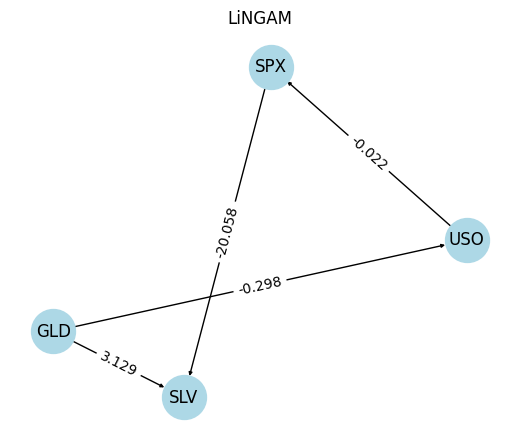

In [29]:
import pandas as pd
from lingam import DirectLiNGAM
import matplotlib.pyplot as plt
import networkx as nx

# 必要な変数を抽出
df_lingam = df[['SPX', 'USO', 'SLV', 'GLD', 'EUR/USD']]

# LiNGAMモデルの学習
model = DirectLiNGAM()
model.fit(df_lingam)

# 因果行列（重み）
adj_matrix = model.adjacency_matrix_

# 結果を有向グラフで可視化
labels = df_lingam.columns.tolist()
G = nx.DiGraph()

for i, src in enumerate(labels):
    for j, tgt in enumerate(labels):
        weight = adj_matrix[i, j]
        if abs(weight) > 0.01:  # 小さい値は無視
            G.add_edge(src, tgt, weight=round(weight, 3))

plt.figure(figsize=(5, 4))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, arrowsize=5)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("LiNGAM")
plt.show()

In [30]:
import pandas as pd
from lingam import DirectLiNGAM

# データ準備
target_vars = ['SPX', 'USO', 'SLV', 'GLD', 'EUR/USD']  # 順序は重要
df_lingam = df[target_vars]

# LiNGAMモデルの学習
model = DirectLiNGAM()
model.fit(df_lingam)

# 因果マトリクス（行：原因, 列：結果）
adj_matrix = pd.DataFrame(model.adjacency_matrix_,
                          index=target_vars,
                          columns=target_vars)

# 結果の表示
print("LiNGAMによる因果マトリクス（係数）:")
print(adj_matrix.round(4))


LiNGAMによる因果マトリクス（係数）:
            SPX     USO      SLV     GLD  EUR/USD
SPX      0.0000  0.0000 -20.0583  0.0000      0.0
USO     -0.0222  0.0000   0.0000  0.0000      0.0
SLV      0.0000  0.0000   0.0000  0.0000      0.0
GLD      0.0073 -0.2978   3.1288  0.0000      0.0
EUR/USD -0.0001  0.0043   0.0048 -0.0007      0.0


---
■lingamでわかる因果関係■

1. SPX → SLV（-20.0583）
株価指数が銀ETFに強い負の影響を与えていると推定

      ※大きな係数はスケール依存または多重共線性の可能性あり

2. SLV → GLD（3.129）銀価格が金価格に明確な正の影響を与えている

      安全資産や貴金属ETFの連動性として非常に妥当な構造

3. USO → GLD（-0.298）原油価格が金価格に小さな負の影響を与えている

      リスクオフ環境やインフレヘッジの分散として解釈可能

4. SPX → USO（-0.022）株価指数が原油ETFにごく弱い負の影響

      エネルギーセクターと株式全体の相関を反映している可能性

5. EUR/USD → SPX（-0.001）

      為替が株価に極めて軽微な負の影響（実質ゼロに近い）
---------
---------



## 2. X₁ と X₂ の間に未観測の交絡変数が存在しないことを証明せよ：
**【前提条件】**：
- 経験分布は忠実性を満たしている
- FCIアルゴリズムのすべての独立性検定は正確である

※忠実性
- 確率分布と因果構造の対応関係に矛盾がない

**【証明】**：

 仮定：
FCIの出力グラフにおいて、X₁ ↔ X₂ が存在しない とする。

 目標：
このとき、X₁ と X₂ の間に未観測の交絡因子は存在しないことを示す。

**【ステップ1】**:

FCIの出力グラフにおいて、 X₁ ↔ X₂が存在しないということは、

ある観測変数集合 Z ⊆ V  {X₁, X₂}  が存在し、下記が成立することを意味する。

X₁ ⫫ X₂ | Z

（X₁ と X₂ は Z に条件付けすることで独立）

**【ステップ2】**:

忠実性の仮定より、

X₁ ⫫ X₂ | Z 　 ⇒　  X₁ と X₂ は DAG 上で d-分離されている。

すなわち、DAGにおいて X₁ と X₂ の間には、条件付きで有効な因果パスは存在しない。

このとき、X₁ と X₂ の依存関係は 観測変数のみで説明可能。

**【ステップ3】**:

仮に、未観測の交絡因子 L が X₁ と X₂ に影響を与えていたとすると、

L → X₁　、　L → X₂

という構造があり、X₁ と X₂ はどんな観測変数 Z に条件付けしても独立にはならない。
これは、ステップ1で X₁ ⫫ X₂ | Z が成り立つという仮定と矛盾する。

したがって、X₁ と X₂ の間に未観測の交絡因子が存在するという仮定は矛盾し、存在しないことが証明される。